## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [67]:
from sklearn.preprocessing import OneHotEncoder
data.isna().sum() # Есть пропущенные значения
data = data.dropna() # Удаляем пропущенные значения
data = data.drop(data[data['Sex'] == '.'].index) # Удаляем пингвина с неизвестным полом
# В наборе есть категориальные признаки (Species, Island, Sex, Clutch Completion), закодируем их
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[['Island']]) #Выбираем ohe, так как нам важно понимать принадлежность острову (то есть 0 или 1)
data[encoder.get_feature_names_out()] = encoded_array
data = data.drop(columns=['Island'])

data['Species'] = pd.factorize(data['Species'])[0] # Кодируем все уникальные значения
data['Sex'] = np.where(data['Sex'] == 'MALE', 1, 0) # Есть только значения MALE и FEMALE
data['Clutch Completion'] = np.where(data['Clutch Completion'] == 'Yes', 1, 0) # Есть только значения yes и no
data

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
0,0,1,382,50.9,19.1,196.0,3550.0,1,10.02372,-24.86594,0.0,1.0,0.0
1,0,1,741,45.2,17.8,198.0,3950.0,0,8.88942,-24.49433,0.0,1.0,0.0
2,1,1,744,46.5,13.5,210.0,4550.0,0,7.99530,-25.32829,1.0,0.0,0.0
3,0,1,10,45.2,16.6,191.0,3250.0,0,9.62357,-24.78984,0.0,1.0,0.0
4,1,1,13,48.4,14.4,203.0,4625.0,0,8.16582,-26.13971,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0,1,382,47.6,18.3,195.0,3850.0,0,8.83502,-24.65859,0.0,1.0,0.0
340,2,1,382,39.7,18.4,190.0,3900.0,1,9.29808,-25.23453,0.0,0.0,1.0
341,2,1,16,38.6,17.2,199.0,3750.0,0,8.77322,-26.48973,1.0,0.0,0.0
342,1,1,392,46.6,14.2,210.0,4850.0,0,8.38289,-26.86352,1.0,0.0,0.0


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [68]:
X = data.drop('Species', axis=1)
y = data['Species']

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [69]:
from sklearn.model_selection import train_test_split
np.random.seed(983)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
# stratify важно использовать, потому что нам нужна равная разбивка по классам, чтобы модель имела равные возможности изучать каждый класс, а не "много одного и мало других"

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_t = scaler.fit_transform(X_train[['Flipper Length (mm)', 'Body Mass (g)']])
X_test_t = scaler.fit_transform(X_test[['Flipper Length (mm)', 'Body Mass (g)']])

clf1 = KNeighborsClassifier(n_neighbors=1).fit(X_train_t, y_train)
clf2 = KNeighborsClassifier(n_neighbors=3).fit(X_train_t, y_train)
clf3 = KNeighborsClassifier(n_neighbors=5).fit(X_train_t, y_train)
clf4 = KNeighborsClassifier(n_neighbors=10).fit(X_train_t, y_train)
clf5 = KNeighborsClassifier(n_neighbors=15).fit(X_train_t, y_train)
clf6 = KNeighborsClassifier(n_neighbors=25).fit(X_train_t, y_train)

def acc(clf, X, y): return np.round(np.mean(clf.predict(X) == y), 2)

accuracy = pd.DataFrame({'NN' : [1, 3, 5, 10, 15, 25],
                      'Train' : [acc(clf1, X_train_t, y_train), acc(clf2, X_train_t, y_train), acc(clf3, X_train_t, y_train), acc(clf4, X_train_t, y_train), acc(clf5, X_train_t, y_train), acc(clf6, X_train_t, y_train)],
                      'Test' : [acc(clf1, X_test_t, y_test), acc(clf2, X_test_t, y_test), acc(clf3, X_test_t, y_test), acc(clf4, X_test_t, y_test), acc(clf5, X_test_t, y_test), acc(clf6, X_test_t, y_test)]})
print(accuracy.to_string(index=False))

 NN  Train  Test
  1   0.97  0.81
  3   0.85  0.82
  5   0.87  0.80
 10   0.81  0.81
 15   0.82  0.82
 25   0.81  0.83


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [71]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [72]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

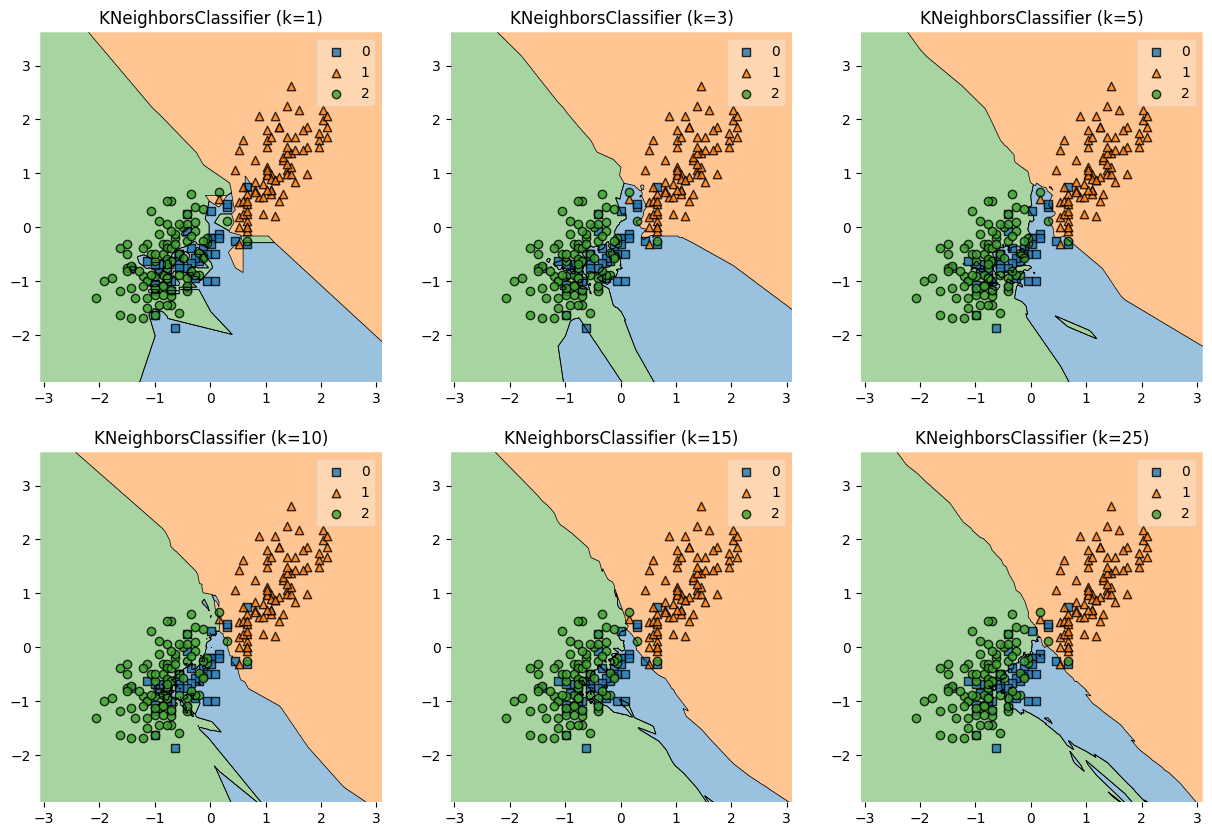

In [73]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15,10))

labels = ['KNeighborsClassifier (k=1)', 'KNeighborsClassifier (k=3)', 'KNeighborsClassifier (k=5)', 'KNeighborsClassifier (k=10)', 'KNeighborsClassifier (k=15)', 'KNeighborsClassifier (k=25)']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], labels, [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train_t, np.array(y_train), clf, n_jobs=-1)
    plt.title(lab)
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [74]:
print("При k=1 модель отлично работает на тренировочных данных, но значительно хуже на тестовых, что является явным признаком переобучения.\nПри 25 соседях достигается самый лучший результат на тестовых данных при хорошей точности на обучающей выборке, что является оптимальным количеством\nв данном случае.Из графика видно, что при увеличении k граница принятия решений сглаживается, однако при большом k=25, модель теряются важные локальные\nструктуры, что может привести к недообучению.Поэтому на основе результатов в 1.3 и 1.5 я бы выбрал k = 15 как наиболее оптимальное, так как accuracy\nхорошее при таком k и график имеет хорошие более менее гладкие границы. Не исключаю того, что можно попробовать k между 15 и 25, возможно, она\nдаст более оптимальный результат.")

При k=1 модель отлично работает на тренировочных данных, но значительно хуже на тестовых, что является явным признаком переобучения.
При 25 соседях достигается самый лучший результат на тестовых данных при хорошей точности на обучающей выборке, что является оптимальным количеством
в данном случае.Из графика видно, что при увеличении k граница принятия решений сглаживается, однако при большом k=25, модель теряются важные локальные
структуры, что может привести к недообучению.Поэтому на основе результатов в 1.3 и 1.5 я бы выбрал k = 15 как наиболее оптимальное, так как accuracy
хорошее при таком k и график имеет хорошие более менее гладкие границы. Не исключаю того, что можно попробовать k между 15 и 25, возможно, она
даст более оптимальный результат.


### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

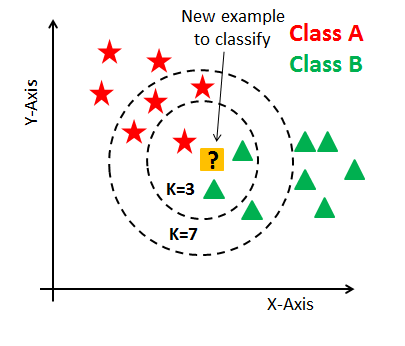

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [75]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      self.k = k

    def fit(self, X, y):
      if X.shape[0] != y.shape[0]: raise ValueError("Количество образцов X и y должно совпадать")
      self.X_train, self.y_train = X, y

    def predict(self, X):
      if self.X_train is None or self.y_train is None: raise ValueError("Модель не обучена, вызовите fit().")
      distances = self.count_distance(self.X_train, X)
      predicts = []
      for dist in distances:
        k_nearest_indexes = np.argsort(dist)[:self.k]
        targets = self.y_train[k_nearest_indexes]
        predicts.append(int(max(Counter(targets))))
      return np.array(predicts)

    def count_distance(self, x, y):
      dists = []
      for obj in y: dists.append(np.linalg.norm(x - obj, axis = 1))
      return dists


In [76]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [77]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [78]:
knn = KNN(k=3)
np.random.seed(9321)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()['Species']
y_test = y_test.reset_index()['Species']
X_train_t = scaler.fit_transform(X_train[['Flipper Length (mm)', 'Body Mass (g)']])
X_test_t = scaler.fit_transform(X_test[['Flipper Length (mm)', 'Body Mass (g)']])
knn.fit(X_train_t, y_train)
print('accuracy:', (knn.predict(X_test_t) == y_test).mean())

accuracy: 0.7959183673469388


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [82]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [83]:
data.isna().sum() # Нет пропущенных значений
# Столбец Unnamed бессмысленен, так как он прост равен индексу + 1
data = data.drop('Unnamed: 0', axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [84]:
print("Наибольшую корреляцию имеют вещественные признаки: [x с y с z попарно между собой], [carat с (price, x, y и z)] и [price с (x, y, z)]\nпримерно в порядке убывания корреляций")
data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()

Наибольшую корреляцию имеют вещественные признаки: [x с y с z попарно между собой], [carat с (price, x, y и z)] и [price с (x, y, z)]
примерно в порядке убывания корреляций


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [85]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[['cut', 'color', 'clarity']])

categories = pd.DataFrame(columns=encoder.get_feature_names_out(), data=encoded_array)
data = categories.merge(data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']], left_index=True, right_index=True)

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [86]:
X = data.drop('price', axis=1)
y = data['price']

np.random.seed(983)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [87]:
scaler = StandardScaler()

X_train_t =  np.hstack((X_train.loc[:, :'clarity_VVS2'].values, scaler.fit_transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])))
X_test_t = np.hstack((X_test.loc[:, :'clarity_VVS2'].values, scaler.fit_transform(X_test[['carat', 'depth', 'table', 'x', 'y', 'z']])))

print("Стандартизация признаков улучшает их интерпретируемость в плане важности признаков, устраняет влияние масштаба данных и ускоряет обучение модели")

Стандартизация признаков улучшает их интерпретируемость в плане важности признаков, устраняет влияние масштаба данных и ускоряет обучение модели


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [88]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_t, y_train)

y_train_pred = model.predict(X_train_t)
y_test_pred = model.predict(X_test_t)

MSE_train = ((y_train_pred - y_train) ** 2).mean()
MSE_test = ((y_test_pred - y_test) ** 2).mean()
print(f'MSE_train: {MSE_train}\nMSE_test: {MSE_test}')

MSE_train: 1300437.8867024346
MSE_test: 1235159.490358419


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [89]:
print("На порядок по модулю превышают оценки признаков depth и clarity_I1\n")
print(data.columns, "\n")
coeffs = model.coef_
list(coeffs)

На порядок по модулю превышают оценки признаков depth и clarity_I1

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'carat',
       'depth', 'table', 'price', 'x', 'y', 'z'],
      dtype='object') 



[np.float64(-558.7634966382388),
 np.float64(-5.19057636720521),
 np.float64(243.05205150020817),
 np.float64(171.62374353974712),
 np.float64(149.27827796548533),
 np.float64(837.6816635848078),
 np.float64(617.4134789509454),
 np.float64(548.0632667829344),
 np.float64(327.15728553471087),
 np.float64(-150.34406230782434),
 np.float64(-631.6994398474916),
 np.float64(-1548.272192698084),
 np.float64(-3899.6483535502325),
 np.float64(1562.1170955625269),
 np.float64(-143.1241575208094),
 np.float64(-1112.2943294820464),
 np.float64(778.0528178493756),
 np.float64(462.8441980996127),
 np.float64(1223.3037356102795),
 np.float64(1128.7489934312937),
 np.float64(5312.610693254464),
 np.float64(-87.27832125234107),
 np.float64(-60.972905530627145),
 np.float64(-1074.4115178341922),
 np.float64(4.292251873973797),
 np.float64(-40.095721805742045)]

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [90]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso_model = Lasso(alpha=10)
ridge_model = Ridge(alpha=10)

lasso_model_coeffs = lasso_model.fit(X_train_t, y_train).coef_
ridge_model_coeffs = ridge_model.fit(X_train_t, y_train).coef_
print("Коэффициенты по модулю Lasso изменились достаточно сильно (в среднем на 253.5), а по Ridge немного (в среднем на 0.1),\nследовательно можно сделать вывод, что мультиколлинеарность есть")
print(coeffs - lasso_model_coeffs, (coeffs - lasso_model_coeffs).mean())
print(coeffs - ridge_model_coeffs, (coeffs - ridge_model_coeffs).mean())

Коэффициенты по модулю Lasso изменились достаточно сильно (в среднем на 253.5), а по Ridge немного (в среднем на 0.1),
следовательно можно сделать вывод, что мультиколлинеарность есть
[-162.29107891   28.11432282  160.45537654  171.62374354  149.27827797
  472.98087534  431.97400066  422.87857462  327.15728553  264.56824906
  199.51004504   95.60083307 -262.7220905   853.11817586  489.06927113
  429.6068406   615.3311167   479.69262867  686.30869281  634.58010921
  469.24633007   11.3237278    19.00666807 -397.10303432    4.29225187
   -2.51409855] 253.50334979622065
[  2.60597333   0.09085432  -1.11698553  -0.15713652  -1.42270561
   4.78118132   3.60058612   3.53073399   1.66011075   0.37081274
  -3.22362321 -10.7198017  -76.20945839  20.46494817   8.44263672
   4.15132277  10.477513     8.838883    12.58845085  11.24570389
  38.2342788   -1.36589871   0.3210432  -40.24136534   2.45960386
   3.32230564] 0.10499874813757039


**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.550e+07, tolerance: 6.069e+07
  model = cd_fast.enet_coordinate_descent(


Сильнее снижает норму коффициентов метод Lasso. С помощью Lasso можно отбирать наиболее значимые признаки, поэтому этот метод используют чаще


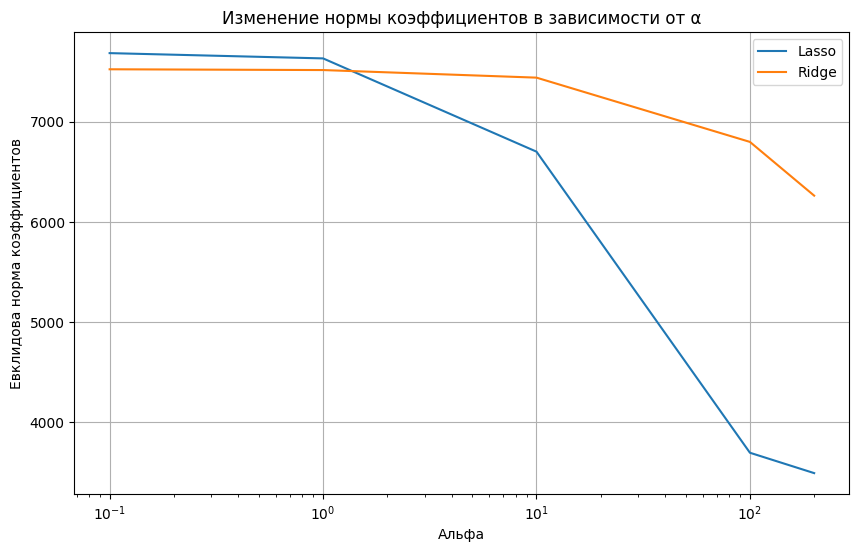

In [91]:
alphs = [0.1, 1, 10, 100, 200]

lasso_norms = []
ridge_norms = []

for alph in alphs:
    lasso = Lasso(alpha=alph)
    ridge = Ridge(alpha=alph)

    lasso.fit(X_train_t, y_train)
    ridge.fit(X_train_t, y_train)

    lasso_norms.append(np.linalg.norm(lasso.coef_))
    ridge_norms.append(np.linalg.norm(ridge.coef_))

print("Сильнее снижает норму коффициентов метод Lasso. С помощью Lasso можно отбирать наиболее значимые признаки, поэтому этот метод используют чаще")

plt.figure(figsize=(10, 6))
plt.plot(alphs, lasso_norms, label="Lasso")
plt.plot(alphs, ridge_norms, label="Ridge")
plt.legend()
plt.grid(True)
plt.title("Изменение нормы коэффициентов в зависимости от α")
plt.xlabel("Альфа")
plt.ylabel("Евклидова норма коэффициентов")
plt.xscale("log")
plt.show()

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [92]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5).fit(X_train_t, y_train)
print(reg.mse_path_.mean(axis=1))
print(reg.alphas_)
best_alpha = reg.alphas_[np.argmin(reg.mse_path_.mean(axis=1))]
print('\n', f'mse_min: {np.min(reg.mse_path_.mean(axis=1))}, alpha: {best_alpha}')

[16022538.18123091 14300143.87209497 12753176.29122623 11407713.71135901
 10237509.16844444  9219734.44132974  8334534.75374     7564641.47699635
  6895035.27880186  6312653.14743004  5806133.57648805  5365594.93978924
  4982442.73327857  4649201.92403804  4359371.13613964  4107295.82906554
  3888057.9948858   3697380.22260103  3531542.25830468  3387308.43356519
  3261864.5464246   3152762.96379513  3057874.87440249  2975348.7609047
  2903574.28112786  2841150.85387118  2786860.33650209  2739643.26137772
  2698578.16754834  2662863.62457559  2631802.59781154  2604788.85015824
  2581295.11505076  2560862.80995804  2543093.08974451  2527639.06537249
  2514199.03615604  2502510.60354833  2492345.55164001  2483505.39450198
  2475817.5035137   2469131.73913195  2463317.52139465  2458261.28201273
  2453864.24834675  2438049.69746312  2404255.81243364  2374573.52658321
  2345943.63655122  2316825.31183706  2291424.65833969  2269332.48356985
  2243104.67309995  2212999.12050025  2186815.713539

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [93]:
lasso_mbest = Lasso(alpha=best_alpha)
lasso_mbest.fit(X_train_t, y_train)
lasso_best = lasso_mbest.fit(X_train_t, y_train).coef_
print(X_train.columns, '\n\n', lasso_best)
print("Неинформативные: cut_Premium, cut_Very Good, color_G, y\nНаиболее информативные: clarity_I1, carat")

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'carat',
       'depth', 'table', 'x', 'y', 'z'],
      dtype='object') 

 [ -600.01630698  -116.97035719    82.9495114      0.
     0.           456.34167477   251.06095988   185.29405492
     0.          -454.30140543  -911.81938707 -1790.06961478
 -4133.57339337   914.76545201  -655.85044184 -1602.63953588
   218.72330782   -46.09778691   637.37257958   561.78179924
  5138.46191911   -91.89975188   -67.43686565  -923.60343744
    -0.           -39.73363922]
Неинформативные: cut_Premium, cut_Very Good, color_G, y
Наиболее информативные: clarity_I1, carat


**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [94]:
y_test_pred = lasso_mbest.predict(X_test_t)
print(f'[lasso] -> {((y_test_pred - y_test) ** 2).mean()} > {MSE_test} <- [linear Regression]')
print("Для предсказаний лучше использовать модель обычной линейной регрессии. Сложно оценить какая модель лучше,\nтак как их среднеквадратические ошибки примерно равны")

[lasso] -> 1239660.3070269348 > 1235159.490358419 <- [linear Regression]
Для предсказаний лучше использовать модель обычной линейной регрессии. Сложно оценить какая модель лучше,
так как их среднеквадратические ошибки примерно равны
